In [1]:
import numpy as np
import sys
import cv2

# Review

In [8]:
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print('video open failed')
    cap.release()
    sys.exit()

cv2.namedWindow('webcam')

width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))
fourcc = cv2.VideoWriter_fourcc(*"DIVX")

# out = cv2.VideoWriter('my_webcam.avi',width, height, fps, fourcc)
while True:

    ret, frame = cap.read()

    if not ret:
        print("Video Read Failed")
        break
    ###################IMAGE PROCESSING############################
    edge = cv2.Canny(frame, 50, 100)
    edge = cv2.cvtColor(edge,cv2.COLOR_GRAY2BGR)
    ###############################################################
    # out.write(edge)
    cv2.imshow('webcam',frame)
    cv2.imshow('edge',edge)
    if cv2.waitKey(10) == 27:
        break
cap.release()
# out.release()
cv2.destroyAllWindows()
    

In [15]:
oldx, oldy = -1, -1
def call_mouse (event, x, y, flags, param):
    global oldx
    global oldy
    if event == cv2.EVENT_LBUTTONDOWN:
        print("Event Left Button Down:",x,y)
        oldx, oldy = x, y
    elif event == cv2.EVENT_MOUSEMOVE:
        if flags ==  cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx, oldy), (x,y), (255,255,0),5,cv2.LINE_AA)
            cv2.imshow('img',img)
            oldx, oldy = x, y

img = np.ones((400,600,3), dtype = np.uint8)*255

cv2.namedWindow('img') # mouse callback을 받기 위해 window 창 받기
cv2.setMouseCallback('img',call_mouse,img)
cv2.imshow('img',img)

cv2.waitKey()
cv2.destroyAllWindows()

Event Left Button Down: 112 73
Event Left Button Down: 25 12
Event Left Button Down: 299 217


In [18]:
oldx, oldy = -1, -1
b, g, r = 0, 0, 0
def call_mouse (event, x, y, flags, param):
    global oldx
    global oldy
    global b
    global g
    global r
    if event == cv2.EVENT_LBUTTONDOWN:
        print("Event Left Button Down:",x,y)
        oldx, oldy = x, y
    elif event == cv2.EVENT_MOUSEMOVE:
        if flags ==  cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx, oldy), (x,y), (b,g,r),5,cv2.LINE_AA)
            cv2.imshow('img',img)
            oldx, oldy = x, y

def call_track_blue(pos):
    global b
    b = pos

def call_track_green(pos):
    global g
    g = pos

def call_track_red(pos):
    global r
    r = pos
    

img = np.ones((400,600,3), dtype = np.uint8)*255

cv2.namedWindow('img') # mouse callback을 받기 위해 window 창 받기
cv2.createTrackbar('Blue','img',0,255,call_track_blue)
cv2.createTrackbar('Grean','img',0,255,call_track_green)
cv2.createTrackbar('Red','img',0,255,call_track_red)
cv2.setMouseCallback('img',call_mouse,img)
cv2.imshow('img',img)

cv2.waitKey()
cv2.destroyAllWindows()

Event Left Button Down: 108 43
Event Left Button Down: 233 51
Event Left Button Down: 317 171
Event Left Button Down: 476 105
Event Left Button Down: 402 35
Event Left Button Down: 315 44
Event Left Button Down: 536 4
Event Left Button Down: 89 237
Event Left Button Down: 193 220
Event Left Button Down: 236 248
Event Left Button Down: 268 246
Event Left Button Down: 432 226
Event Left Button Down: 493 260
Event Left Button Down: 530 252


In [21]:
src = cv2.imread(r'C:/Users/ir749/Desktop/fig/lenna.bmp',cv2.IMREAD_COLOR)

if src is None:
    print(" image read fail")

#dst = src + 100
#dst = cv2.add(src,100)
dst = np.clip(src + 100., 0 ,255).astype(np.uint8)
dst = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
cv2.imshow('img',src)
cv2.imshow('dst',dst)

cv2.waitKey()
cv2.destroyAllWindows()

# 산술연산

In [39]:
img1 = cv2.imread(r'C:/Users/ir749/Desktop/fig/lenna256.bmp',cv2.IMREAD_GRAYSCALE)
img2 = np.zeros((256,256),np.uint8)

cv2.circle(img2,center = (128,128), radius = 100, color = 100, thickness= -1 )
cv2.circle(img2,center = (128,128), radius = 50, color = 50, thickness= -1 )  # img, centerPoint , radius

dst1 = cv2.add(img1,img2)
dst2 = cv2.addWeighted(img1, alpha = 0.8, src2 = img2, beta = 0.1, gamma = 0.0)  #dst = src1*alpha + src2*beta + gamma;
dst3 = cv2.subtract(img2,img1)  # 빼기
dst4 = cv2.absdiff(img2,img1) # 절댓값 빼기
  

cv2.imshow('img',img1)
cv2.imshow('img2',img2)
cv2.imshow('dst1',dst1)
cv2.imshow('dst2',dst2)
cv2.imshow('dst3',dst3)
cv2.imshow('dst4',dst4)

cv2.waitKey()
cv2.destroyAllWindows()

# BGR channel Splitting

In [47]:
src = cv2.imread(r'C:/Users/ir749/Desktop/fig/flowers_rgb.jpg',cv2.IMREAD_COLOR)
print(src.shape)

# b, g, r = cv2.split(src)
b = src[:,:,0]
g = src[:,:,1]
r = src[:,:,2]

cv2.imshow('src',src)
cv2.imshow('src_b',b)
cv2.imshow('src_g',g)
cv2.imshow('src_r',r)

cv2.waitKey()
cv2.destroyAllWindows()

(367, 550, 3)


# HSV Channel Splitting

In [17]:
src = cv2.imread(r'C:/Users/ir749/Desktop/fig/flowers_rgb.jpg',cv2.IMREAD_COLOR)
print(src.shape)

src_hsv = cv2.cvtColor(src,cv2.COLOR_BGR2HSV)
# b, g, r = cv2.split(src)
h = src_hsv[:,:,0]
s = src_hsv[:,:,1]
v = src_hsv[:,:,2]

cv2.imshow('src',src)
cv2.imshow('src_h',h)
cv2.imshow('src_s',s)
cv2.imshow('src_v',v)

cv2.waitKey()
cv2.destroyAllWindows()

(367, 550, 3)


# Check RGB Histogram

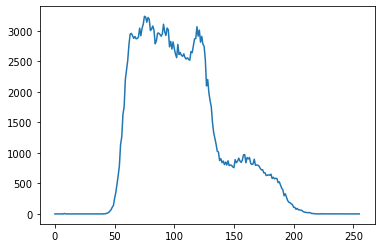

In [20]:
import matplotlib.pyplot as plt
hist = cv2.calcHist([src], [0], None, [256], [0, 256])

plt.plot(hist)
plt.show()

cv2.imshow('src', src)

cv2.waitKey()
cv2.destroyAllWindows()

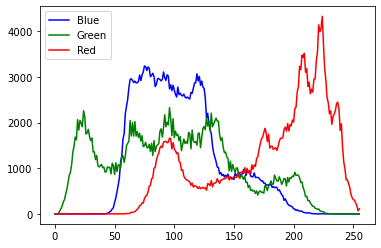

In [19]:
src = cv2.imread(r'C:/Users/ir749/Desktop/fig/lenna.bmp', cv2.IMREAD_COLOR)

b, g, r = cv2.split(src)

b_hist = cv2.calcHist([b], [0], None, [256], [0, 256])
g_hist = cv2.calcHist([g], [0], None, [256], [0, 256])
r_hist = cv2.calcHist([r], [0], None, [256], [0, 256])

plt.plot(b_hist, color='b', label='Blue')
plt.plot(g_hist, color='g', label='Green')
plt.plot(r_hist, color='r', label='Red')
plt.legend()
plt.show()

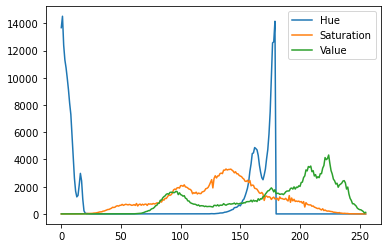

In [21]:
h, s, v = cv2.split(cv2.cvtColor(src, cv2.COLOR_BGR2HSV))

h_hist = cv2.calcHist([h], [0], None, [256], [0, 256])
s_hist = cv2.calcHist([s], [0], None, [256], [0, 256])
v_hist = cv2.calcHist([v], [0], None, [256], [0, 256])

plt.plot(h_hist, label='Hue')
plt.plot(s_hist, label='Saturation')
plt.plot(v_hist, label='Value')
plt.legend()
plt.show()

# 명암비 조정


In [5]:
src = cv2.imread(r'C:/Users/ir749/Desktop/fig/Hawkes.jpg',cv2.IMREAD_GRAYSCALE)

cv2.imshow('src',src)

smin,smax,_,_ = cv2.minMaxLoc(src)
print(f'min : {smin}\nmax : {smax}')
#dst = np.clip((255*(src-smin) / (smax - smin)),0,255).astype(np.uint8)  # Histogram streching(Normalization)
dst = cv2.normalize(src,None,alpha = 0, beta = 255, norm_type=  cv2.NORM_MINMAX)

cv2.imshow('dst',dst)
cv2.waitKey()
cv2.destroyAllWindows()

min : 113.0
max : 213.0


In [6]:
src = cv2.imread(r'C:/Users/ir749/Desktop/fig/Hawkes.jpg',cv2.IMREAD_GRAYSCALE)

dst2 = cv2.equalizeHist(src)

cv2.imshow('src',src)
cv2.imshow('Minmax',dst)
cv2.imshow('equlize',dst2)
cv2.waitKey()
cv2.destroyAllWindows()

# Color image histogram Normalize

### HSV SYSTEM Equlizaiton

In [9]:
src = cv2.imread(r'C:/Users/ir749/Desktop/fig/field.bmp')
# bgr to hsv
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)
# V channel histogram equlization
v = cv2.equalizeHist(v)

dst_hsv = cv2.merge([h,s,v])
dst_hsv = cv2.cvtColor(dst_hsv,cv2.COLOR_HSV2BGR)

cv2.imshow('src',src)
cv2.imshow('hsv',dst_hsv)
cv2.waitKey()
cv2.destroyAllWindows()

### YCrCb System Equlization

In [16]:
src = cv2.imread(r'C:/Users/ir749/Desktop/fig/field.bmp')

y_cr_cb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)

y, cr, cb  = cv2.split(y_cr_cb)

y = cv2.equalizeHist(y)

dst = cv2.merge([y,cr,cb])

dst = cv2.cvtColor(dst,cv2.COLOR_YCrCb2BGR)

cv2.imshow('src',src)
cv2.imshow('hsv',dst)
cv2.waitKey()
cv2.destroyAllWindows()